# Hello Fashion MNIST ANN Classifier

In [20]:
# Prerequisites
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print("Python Version: ", sys.version)

from tensorflow import keras
from tensorflow.keras import layers

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]


## Load Dataset

Fashion MNIST has the same format as MNIST; 70k grayscale images of 28 × 28 pixels each, with 10 classes, but the images represent fashion items rather than handwritten digits.

Fashion MNIST dataset included with TensorFlow.  It’s already shuffled and split into a training set (60,000 images) and a test set (10,000 images).

In [2]:
fmnist = keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fmnist

# Hold out last 5K images from training set for validation
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print("X_train shape: ", X_train.shape)
print("X_train type: ", X_train.dtype)

X_train shape:  (55000, 28, 28)
X_train type:  uint8


#### Defines target names

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#### Show first training images

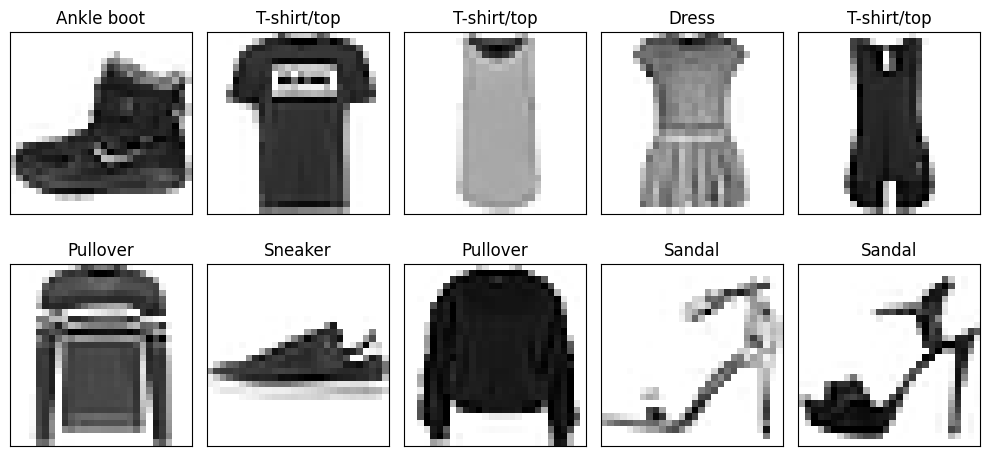

In [5]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.xticks([])  # No x ticks
    plt.yticks([])  # No y ticks
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]])

plt.tight_layout()
plt.show()


#### Scale the dataset to [0.0 - 1.0] and convert to floats by dividing with 255.0 .  

In [13]:
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0 

## Create Model

In [7]:
keras.utils.set_random_seed(42)
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=[28, 28]))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

d:\MyGithub\ML_TensorFlow_Keras_Experiments\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Get Layers
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [12]:
# Get weights and biases
weights, biases = model.layers[1].get_weights()
print("Layer 1 weights:\n", weights)
print("Layer 1 biases:\n", biases)

Layer 1 weights:
 [[ 5.3297073e-02  2.4198458e-02 -2.1023259e-02 ...  3.5795525e-02
  -7.2061256e-02  4.6089381e-02]
 [ 2.2632368e-02  5.9892908e-03  1.4587238e-02 ...  8.7194145e-03
   4.9419701e-05  2.4750374e-02]
 [-4.4513181e-02  4.6743892e-02  1.0291643e-02 ... -4.6910450e-02
   1.4408320e-02  5.3473756e-02]
 ...
 [-6.0724389e-02 -2.6091568e-02 -2.8863657e-02 ...  4.1813411e-02
   3.5757974e-02  7.3892877e-02]
 [-4.4557646e-02 -5.9672445e-02  6.5973431e-02 ... -5.0661370e-02
  -2.6788648e-02  5.1353276e-02]
 [-1.4996272e-02  1.0063291e-02 -3.2075007e-02 ...  5.3060532e-02
   6.6655308e-02 -6.4764827e-02]]
Layer 1 biases:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.


## Compile the model

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## Train the model

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6778 - loss: 1.0128 - val_accuracy: 0.8298 - val_loss: 0.5026
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8244 - loss: 0.5103 - val_accuracy: 0.8420 - val_loss: 0.4473
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8414 - loss: 0.4556 - val_accuracy: 0.8470 - val_loss: 0.4232
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8526 - loss: 0.4245 - val_accuracy: 0.8546 - val_loss: 0.4084
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8596 - loss: 0.4024 - val_accuracy: 0.8568 - val_loss: 0.3972
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8657 - loss: 0.3852 - val_accuracy: 0.8598 - val_loss: 0.3895
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8703 - loss: 0.3709 - val_accuracy: 0.8600 - val_loss: 0.3838
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8739 - loss: 0.3585 - 

The returned History object contains the training parameters (history.params), list of epochs (history.epoch), and a dictionary (history.history) containing the loss and extra metrics measured at the end of each epoch on the training set and on the
validation set.

In [19]:
print(history.params)

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}


In [18]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


#### Plot the training and validation accuracry and loss

In [21]:
df_history = pd.DataFrame(history.history)
df_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.761636,0.723944,0.8298,0.502588
1,0.829964,0.489426,0.8420,0.447321
2,0.844691,0.443306,0.8470,0.423237
3,0.854873,0.415226,0.8546,0.408391
4,0.860945,0.394956,0.8568,0.397217


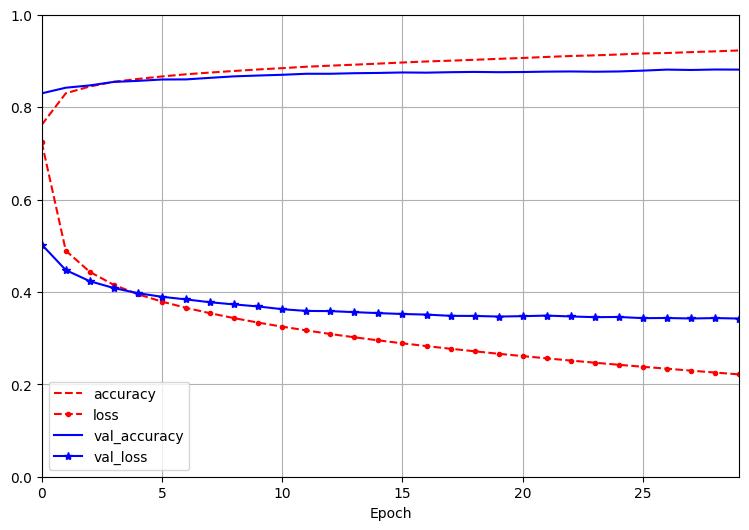

In [22]:
df_history.plot(figsize=(9,6), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.show()


## Evaluate Model

In [23]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8748 - loss: 0.3617


[0.36279937624931335, 0.8729000091552734]

## Make Predictions

Use first samples from test data

In [26]:
# Try with first 10 test samples
X_new = X_test[:10]
y_probs = model.predict(X_new)
print(y_probs.round(2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.   0.   0.   0.   0.   0.31 0.   0.01 0.   0.68]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.26 0.   0.02 0.   0.   0.   0.72 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.98 0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.02 0.   0.98 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]]


In [27]:
# Print out predicted classes (largest probability)
y_preds = y_probs.argmax(axis=-1)
print(y_preds)

[9 2 1 1 6 1 4 6 5 7]


In [30]:
# Check how many correcy
nr_correct = np.sum(y_preds == y_test[:10])
nr_correct

np.int64(10)

In [29]:
# Print out predicted labels
np.array(class_names)[y_preds]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

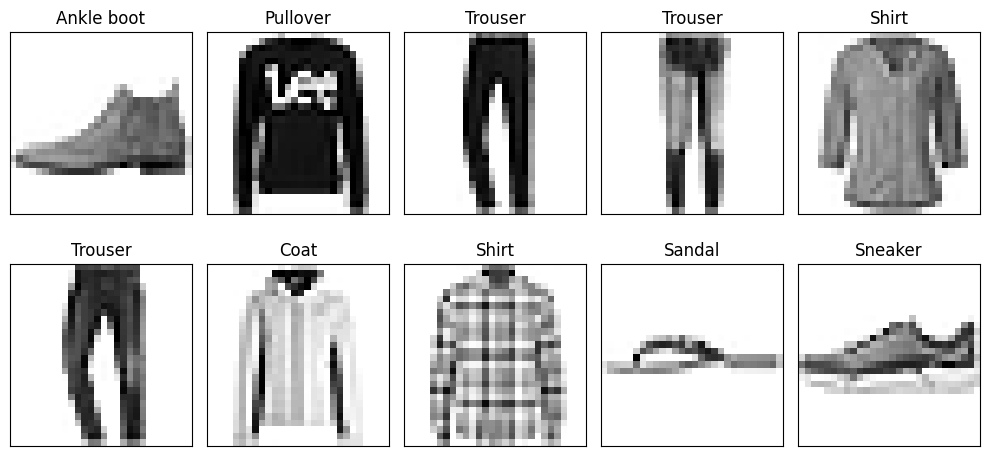

In [31]:
# Plot predictions
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.xticks([])  # No x ticks
    plt.yticks([])  # No y ticks
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.title(class_names[y_test[i]])

plt.tight_layout()
plt.show()